# Compare GHS Index and Deaths

After we failed with our other attempts, we wanted to take a look at the data we thought would be connceted.
This is the GHS Index, representing how well prepared a country is for a pandemic, and its connection to the (reported) deaths.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

PATH_DATA_DEATHS = './data/computed/deaths.csv'
PATH_DATA_CASES = './data/computed/cases.csv'
PATH_DATA_REDUCED = './data/computed/collected_data_reduced_features.csv'

In [5]:
df = pd.read_csv(PATH_DATA_DEATHS)
df_cases = pd.read_csv(PATH_DATA_CASES).loc[:, ["location", "total_cases_per_million"]]
df = df.merge(df_cases, how = 'left', on = ['location'])
df_ghs = pd.read_csv(PATH_DATA_REDUCED).loc[:, ["location", "ghs_score"]]
df = df.merge(df_ghs, how = 'left', on = ['location'])
df.drop(["total_deaths"], axis=1, inplace=True)
#df.drop(["total_cases"], axis=1, inplace=True)
df.dropna(inplace=True)
df.describe()

,total_deaths_per_million,gdp_per_capita,cvd_death_rate,health_expenditure_5y_avg,total_cases_per_million,ghs_score
count,162.000000,162.000000,162.00000,162.000000,162.000000,162.000000
mean,59.403907,19120.385994,252.38537,6.467686,1730.582481,42.945062
std,129.456628,19961.847637,115.81438,2.527267,3280.411748,13.960664
min,0.000000,661.240000,79.37000,2.224253,1.867000,16.200000
25%,2.494249,4626.697750,165.50250,4.500535,116.022000,32.525000
50%,10.697168,12265.791000,237.85550,6.305874,498.190500,40.450000
75%,41.361901,27592.496500,318.98050,8.157401,2077.662500,52.000000
max,848.052383,116935.600000,724.41700,16.795518,30684.193000,83.500000


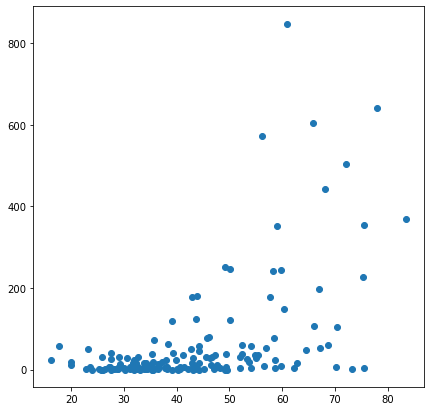

In [6]:
fig, ax = plt.subplots(1, figsize=(7,7))
ax.scatter(df["ghs_score"].values, df["total_deaths_per_million"].values)

We wanted to cluster the data, but this seems impossible based on the visualization.
One reason for this may be countries with a low GHS Index, that may not be able to report valid numbers, or countries with a strategic interest in reporting false numbers or those who ascribe the deaths to other factors instead of COVID.

In [7]:
df = df[(df.ghs_score > 40) & (df.total_cases_per_million > 0)]
df["deaths_per_cases"] = df["total_deaths_per_million"] / df["total_cases_per_million"]

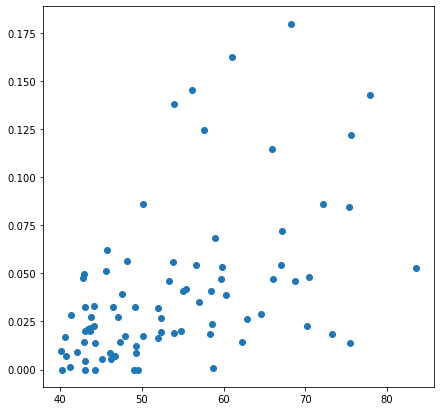

In [8]:
fig, ax = plt.subplots(1, figsize=(7,7))
ax.scatter(df["ghs_score"].values, df["deaths_per_cases"].values)